# Music Informatics: Project

- Vasileios Katsaitis  (1115202000073)
- Dimokritos Kolitsos  (1115201900085)
- Konstantinos Chousos (1115202000215) 

## 1. Data Acquisition
---

In [2]:
import os
import librosa
import numpy as np
import pandas as pd

sample_rate = 44100
duration = 120 # 2 minutes

def trim_starting_zeros(audio):
    # Find the first non-zero sample
    non_zero_index = np.nonzero(audio)[0]
    if len(non_zero_index) > 0:
        return audio[non_zero_index[0]:]
    return audio

def load_and_trim_audio(file_path):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    
    # Trim any starting silence
    trimmed_audio = trim_starting_zeros(audio)
    
    # Take only the first 'duration' seconds after trimming
    trimmed_audio = trimmed_audio[:duration * sample_rate]
    
    return trimmed_audio

def load_audio_dataset(base_path):
    data = []
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith('.mp3'):
                file_path = os.path.join(root, file)
                # Load, trim silence, and get the first 'duration' seconds
                audio, sr = load_and_trim_audio(file_path)
                genre = os.path.basename(os.path.dirname(file_path))
                data.append({
                    'song_name': file,
                    'genre': genre,
                    'audio': audio,
                })
    return pd.DataFrame(data)

# Load the dataset
df = load_audio_dataset('./data')

KeyboardInterrupt: 

In [3]:
import pickle

with open('./data/df.pkl', 'wb') as f:
   pickle.dump(df, f)

del df

NameError: name 'df' is not defined

In [6]:
import pickle

with open('./data/df.pkl', 'rb') as f:
   df = pickle.load(f)

In [7]:
display(df)

,song_name,genre,audio
0,Soen - Monarch (Official Audio).mp3,rock,"[-2.614504e-12, -1.9346736e-12, -1.3613184e-13..."
1,The Sun.mp3,rock,"[3.3863105e-18, 3.1742975e-16, 2.8495999e-15, ..."
2,Stay.mp3,rock,"[1.8573297e-05, 4.293425e-05, -7.148915e-05, 3..."
3,Starman (2012 Remaster).mp3,rock,"[8.845012e-07, -2.044289e-06, 1.8786757e-06, 3..."
4,Greta Van Fleet - Watching Over (Audio).mp3,rock,"[-1.2196446e-28, -1.639675e-26, -2.22026e-25, ..."
5,Fleetwood Mac - The Chain (Official Audio).mp3,rock,"[6.1179917e-06, -2.8497749e-05, -4.8263282e-05..."
6,Alter Bridge - Open Your Eyes (HQ).mp3,rock,"[6.2893264e-21, 5.9412595e-21, 5.578881e-21, 5..."
7,The Last Song.mp3,rock,"[5.2073912e-05, -3.820933e-05, 7.910133e-06, 1..."
8,Pink Floyd - Breathe (In The Air) (2023 Remast...,rock,"[0.00030928192, 0.00046014777, 0.00041460013, ..."
9,No Surprises.mp3,rock,"[-2.785583e-19, -2.3393822e-17, -3.2692137e-16..."


## 2. Feature Extraction
---

In [8]:
import librosa
import numpy as np
import pandas as pd

# Extract MFCCs for each song
mfccs = []
for _, row in df.iterrows():
    audio = row['audio']
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs.append(mfcc)

# Calculate mean and standard deviation of MFCCs for each song
mean_mfccs = []
std_mfccs = []
for mfcc in mfccs:
    mean_mfcc = np.mean(mfcc, axis=0)
    std_mfcc = np.std(mfcc, axis=0)
    mean_mfccs.append(mean_mfcc)
    std_mfccs.append(std_mfcc)

df['mean_mfcc'] = mean_mfccs
df['std_mfcc'] = std_mfccs

# Calculate mean values of features for each genre
genre_means = df.groupby('genre')[['mean_mfcc']].mean()

In [9]:
import pickle

with open('./data/df.pkl', 'wb') as f:
   pickle.dump(df, f)

del df

In [10]:
import pickle

with open('./data/df.pkl', 'rb') as f:
   df = pickle.load(f)

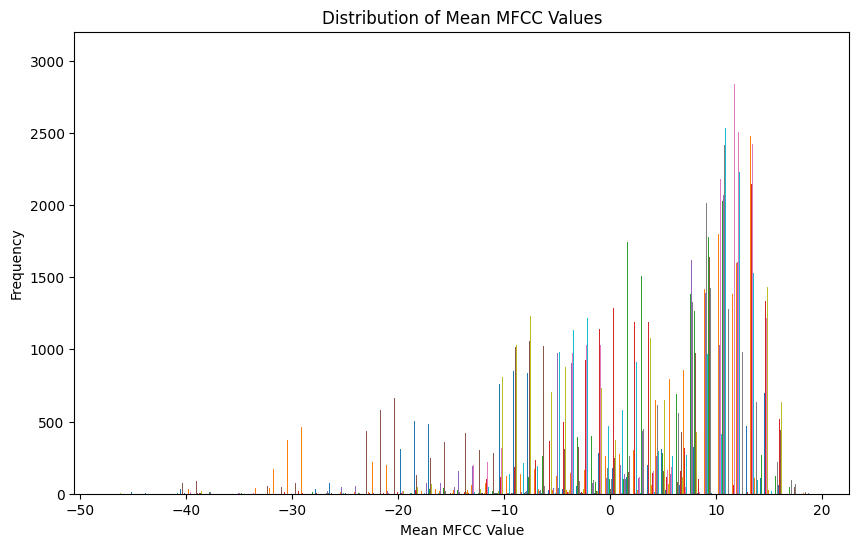

In [16]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of mean MFCC values
plt.figure(figsize=(10, 6))
plt.hist(df['mean_mfcc'].values, bins=50)
plt.xlabel('Mean MFCC Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean MFCC Values')
plt.show()